## KFold vs. StratifiedKFold 

- KFold:<br>
KFold 是最常見的交叉驗證方法之一，它將資料集分成 k 個連續的折數，每個折數中類別的分佈可能是隨機的。 <br>
這意味著在每個折數中，類別的比例可能與原始資料集中的比例不一致，尤其在類別不平衡的情況下。<br>

- StratifiedKFold:<br>
StratifiedKFold 也將資料集分成 k 個折數，但它保證每個折數中每個類別的比例與原始資料集中的比例相同或接近。<br>
這對於類別不平衡的資料集特別重要，因為它確保了在每個折數中，所有類別的樣本都能得到適當的代表。<br>

In [22]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Generate sample data
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13, 14], [15, 16], [17, 18], [19, 20]])
y = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])  # Binary classification labels (0 and 1)

# Display sample data
print("Sample features (X):")
print(X)
print("\nSample labels (y):")
print(y)

# Define the number of splits (k=5)
n_splits = 5

# Initialize StratifiedKFold with 5 splits
kf = StratifiedKFold(n_splits=n_splits)

# Now you can use this kf object in cross-validation or other procedures
# For example:
for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    print("Fold:", fold+1)
    print("Train indices:", train_index)
    print("Test indices:", test_index)
    # Use train_index and test_index to access the data for each fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Train your model using X_train, y_train and evaluate on X_test, y_test


Sample features (X):
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]
 [13 14]
 [15 16]
 [17 18]
 [19 20]]

Sample labels (y):
[0 1 0 1 0 1 0 1 0 1]
Fold: 1
Train indices: [2 3 4 5 6 7 8 9]
Test indices: [0 1]
Fold: 2
Train indices: [0 1 4 5 6 7 8 9]
Test indices: [2 3]
Fold: 3
Train indices: [0 1 2 3 6 7 8 9]
Test indices: [4 5]
Fold: 4
Train indices: [0 1 2 3 4 5 8 9]
Test indices: [6 7]
Fold: 5
Train indices: [0 1 2 3 4 5 6 7]
Test indices: [8 9]


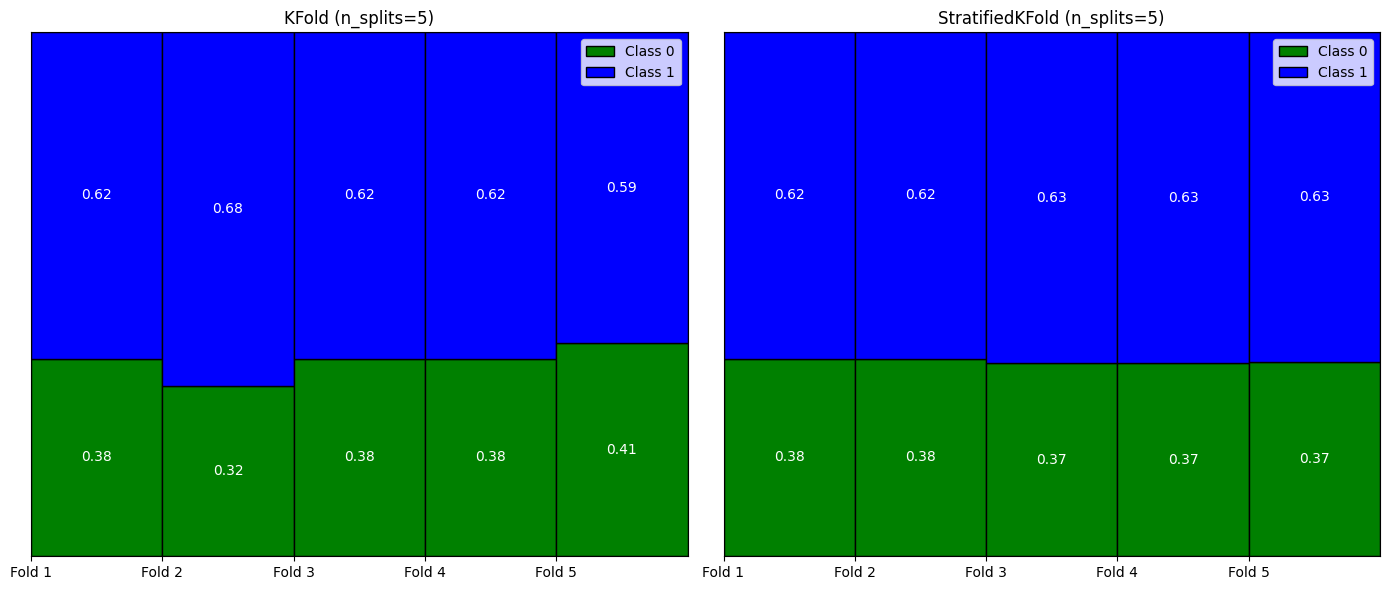

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Initialize KFold and StratifiedKFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Prepare to collect data for visualization
kf_data = []
skf_data = []

# Generate KFold splits
for train_index, test_index in kf.split(X):
    fold_counts = np.bincount(y[test_index], minlength=2)
    kf_data.append(fold_counts / len(test_index))

# Generate StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    fold_counts = np.bincount(y[test_index], minlength=2)
    skf_data.append(fold_counts / len(test_index))

# Colors for the classes
colors = ['green', 'blue']

# Create a figure and axis
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot KFold visualization
for i, fold in enumerate(kf_data):
    bottom = 0
    for j, percentage in enumerate(fold):
        rect = patches.Rectangle((i, bottom), 1, percentage, edgecolor='black', facecolor=colors[j])
        axes[0].add_patch(rect)
        axes[0].text(i + 0.5, bottom + percentage / 2, f'{percentage:.2f}', ha='center', va='center', color='white')
        bottom += percentage

# Plot StratifiedKFold visualization
for i, fold in enumerate(skf_data):
    bottom = 0
    for j, percentage in enumerate(fold):
        rect = patches.Rectangle((i, bottom), 1, percentage, edgecolor='black', facecolor=colors[j])
        axes[1].add_patch(rect)
        axes[1].text(i + 0.5, bottom + percentage / 2, f'{percentage:.2f}', ha='center', va='center', color='white')
        bottom += percentage

# Set titles and labels
axes[0].set_title('KFold (n_splits=5)')
axes[0].set_xticks(range(5))
axes[0].set_xticklabels([f'Fold {i+1}' for i in range(5)])
axes[0].set_yticks([])
axes[0].set_xlim(0, 5)
axes[0].set_ylim(0, 1)

axes[1].set_title('StratifiedKFold (n_splits=5)')
axes[1].set_xticks(range(5))
axes[1].set_xticklabels([f'Fold {i+1}' for i in range(5)])
axes[1].set_yticks([])
axes[1].set_xlim(0, 5)
axes[1].set_ylim(0, 1)

# Add legends
legend_elements = [patches.Patch(facecolor=colors[i], edgecolor='black', label=f'Class {i}') for i in range(len(colors))]
axes[0].legend(handles=legend_elements, loc='upper right')
axes[1].legend(handles=legend_elements, loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()
